# Import all the libraries



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset

In [48]:
df= pd.read_csv('car_data.csv')
df

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,honda,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,honda,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,honda,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,honda,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [49]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#  IT SHOW THE INFORAMTION OF DATASET

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [51]:
df.shape

(301, 10)

In [52]:
df.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [53]:
df.mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17052\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Year              2013.627907
Selling_Price        4.661296
Present_Price        7.628472
Kms_Driven       36947.205980
Owner                0.043189
dtype: float64

In [54]:
df.median()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17052\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Year              2014.0
Selling_Price        3.6
Present_Price        6.4
Kms_Driven       32000.0
Owner                0.0
dtype: float64

In [55]:
df.min()

Car_Name               800
company              bajaj
Year                  2003
Selling_Price          0.1
Present_Price         0.32
Kms_Driven             500
Fuel_Type              CNG
Seller_Type         Dealer
Transmission     Automatic
Owner                    0
dtype: object

In [56]:
df.max()

Car_Name              xcent
company              yamaha
Year                   2018
Selling_Price          35.0
Present_Price          92.6
Kms_Driven           500000
Fuel_Type            Petrol
Seller_Type      Individual
Transmission         Manual
Owner                     3
dtype: object

In [57]:
df_car= df.duplicated().any()

In [58]:
df_car

True

In [59]:
#  it delete the duplicate values
car=df.drop_duplicates()
car

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,honda,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,honda,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,honda,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,honda,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [60]:
# it show the top 5 data
car.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [61]:
#  it show the bottom 5 data

car.tail()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,honda,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,honda,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,honda,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,honda,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,honda,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [62]:
#  it check again the duplicate values
car1= car.duplicated().any()
car1

False

In [63]:
#  it counts the all types of data
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


In [64]:
# split data into training and  testing

In [65]:
car

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,honda,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,honda,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,honda,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,honda,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [66]:
#  it replace the categorial data into numeric data 
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17052\2216534150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17052\2216534150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17052\2216534150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [67]:
#  it delete the categorial column
x= car.drop(['Car_Name','Selling_Price'],axis=1)
#  it assign the target data into y variable
y=car['Selling_Price']


In [68]:
x

,company,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,maruti suzuki,2014,5.59,27000,0,0,0,0
1,maruti suzuki,2013,9.54,43000,1,0,0,0
2,maruti suzuki,2017,9.85,6900,0,0,0,0
3,maruti suzuki,2011,4.15,5200,0,0,0,0
4,maruti suzuki,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,honda,2016,11.60,33988,1,0,0,0
297,honda,2015,5.90,60000,0,0,0,0
298,honda,2009,11.00,87934,0,0,0,0
299,honda,2017,12.50,9000,1,0,0,0


In [69]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [70]:
#  in this import train  test split from sklearn
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)


In [72]:
x_train

,company,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
157,yamaha,2015,0.84,23000,0,1,0,0
295,honda,2015,13.09,60076,1,0,0,0
185,other,2008,0.58,1900,0,1,1,0
219,hyndai,2012,9.40,36000,0,0,0,0
15,maruti suzuki,2016,10.79,43000,1,0,0,0
...,...,...,...,...,...,...,...,...
72,toyota,2013,18.61,56001,0,0,0,0
254,honda,2013,9.90,54242,0,0,0,0
89,toyota,2014,6.76,40000,0,0,0,0
44,maruti suzuki,2012,2.69,50000,0,0,0,0


In [73]:
y_train

157    0.48
295    8.55
185    0.25
219    4.50
15     7.75
       ... 
72     7.45
254    5.25
89     4.75
44     1.25
217    3.15
Name: Selling_Price, Length: 239, dtype: float64

In [74]:
x_test

,company,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
111,other,2016,1.500,8700,0,1,0,0
266,honda,2014,7.000,35000,0,0,0,0
287,honda,2015,7.500,44000,0,0,1,0
20,maruti suzuki,2016,3.950,25000,0,0,0,0
125,other,2009,1.750,40000,0,1,0,0
244,hyndai,2013,9.400,49000,1,0,0,0
105,other,2015,2.370,21700,0,1,0,0
298,honda,2009,11.000,87934,0,0,0,0
206,hyndai,2017,7.130,12479,0,0,0,0
117,other,2015,1.900,14000,0,1,0,0


In [75]:
y_test

111     1.15
266     3.65
287     5.75
20      2.85
125     0.90
244     5.95
105     1.35
298     3.35
206     5.75
117     1.10
182     0.30
201     3.25
169     0.40
30      3.10
195     0.18
163     0.45
249     5.25
216     2.90
92      3.51
8       8.75
67      9.25
61      4.50
134     0.65
24      2.90
103     1.45
45      7.50
288     8.40
150     0.50
137     0.65
264     4.00
14      2.25
274     5.30
21      4.90
158     0.48
57      4.75
88      3.45
153     0.50
257     8.50
179     0.31
19      2.65
55      3.60
12      7.50
285     7.40
181     0.30
133     0.72
115     1.11
18      3.25
29      7.45
224     5.11
132     0.75
220     3.50
166     0.45
218     6.45
250    12.90
211    11.75
270     4.10
272     7.50
11      6.85
46      2.65
152     0.50
Name: Selling_Price, dtype: float64

In [76]:
# int this delete the categorial columns
x_train.drop(columns=['company'], inplace=True)
x_test.drop(columns=['company'], inplace=True)

In [77]:
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
scaler.fit_transform(x_train)

array([[ 0.48311639, -0.75948813, -0.34607501, ...,  1.34601809,
        -0.40024264, -0.18609684],
       [ 0.48311639,  0.57056455,  0.56576149, ..., -0.74293206,
        -0.40024264, -0.18609684],
       [-1.89410042, -0.78771782, -0.86500235, ...,  1.34601809,
         2.49848439, -0.18609684],
       ...,
       [ 0.14351399, -0.11671982,  0.07201811, ..., -0.74293206,
        -0.40024264, -0.18609684],
       [-0.53569082, -0.55862304,  0.31795524, ..., -0.74293206,
        -0.40024264, -0.18609684],
       [ 0.82271879, -0.36970127, -0.54282471, ..., -0.74293206,
        -0.40024264, -0.18609684]])

In [79]:
X_train = scaler.fit_transform(x_train)

In [80]:
X_test = scaler.transform(x_test)

In [81]:
from sklearn.linear_model import LinearRegression
# cross Validation
from sklearn.model_selection import cross_val_score

In [82]:
# estimator
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [83]:

mse = cross_val_score(regression,X_train,y_train,scoring ='neg_mean_squared_error', cv = 10)

In [84]:
import numpy as np
np.mean(mse)

-6.236985995241112

In [85]:
# prediction
reg_pred = regression.predict(X_test)
reg_pred

array([ 1.91292394,  4.55427534,  6.65225765,  4.10146911, -1.01746173,
        6.6061293 ,  1.79394729,  3.89728879,  5.98173703,  1.64683435,
        0.1503512 ,  3.52786455,  1.05418306,  4.69682588,  0.80094835,
       -0.86798097,  5.75198903,  4.40430959,  3.56806574,  7.80120126,
       10.14443663,  5.21812541,  1.98969349,  2.86098881,  2.41338585,
        8.44729724,  7.83855369, -0.36396923,  0.34546598,  4.91729568,
        2.32444387,  4.6057515 ,  5.43846689,  1.89601416,  7.86796072,
        3.64968537,  0.21661481,  7.79116445, -2.21820485,  3.3303276 ,
        7.339056  ,  7.93285688,  7.70558458,  1.15895166,  1.73469593,
        1.43322451,  7.14206799,  7.86452696,  6.73732518,  2.11289822,
        4.61025004,  1.55663995,  5.52461051,  9.73633557,  9.79726398,
        4.40220934,  6.31772961,  7.81956564,  3.01281168,  0.05572561])

In [86]:
from sklearn.metrics import r2_score

In [87]:
score =r2_score(reg_pred,y_test)

In [88]:
score

0.8171897501163677

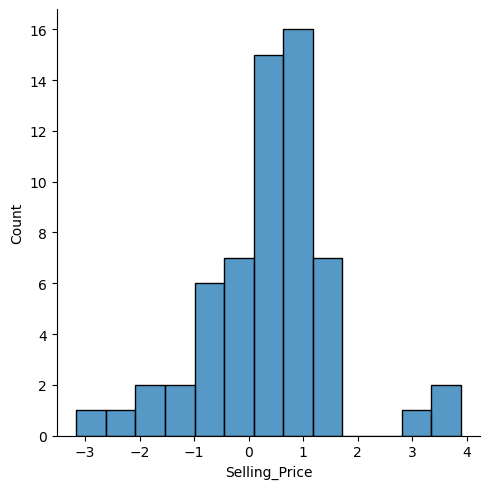

In [89]:
import seaborn as sns
sns.displot(reg_pred-y_test)

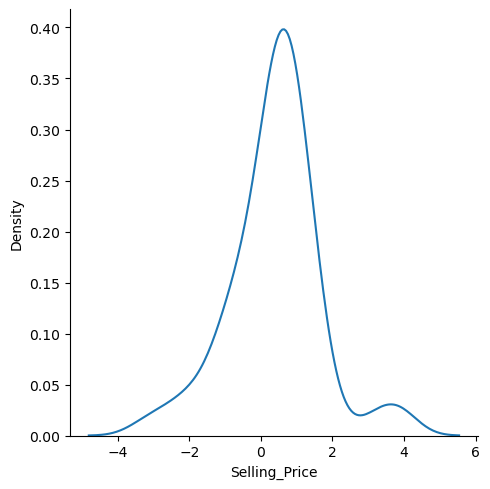

In [90]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind= 'kde')